# 수자원 데이터 분석 프로젝트
이 프로젝트에서는 지역별 지하수 이용량 통계를 바탕으로 1주차 수업에서 다뤘던 시각화 방법을 이용해 지역별 수치를 시각화하였습니다.

데이터 소스
- https://www.data.go.kr/data/15118878/fileData.do

주요 목표:
- 데이터 불러오기 및 전처리
- `Wordcloud`를 사용하여 전국적인 이용량 통계 비교하기
- `Folium`을 사용하여 서울시 구별 지하수 이용량 비교하기

## 0. 데이터 불러오기

In [20]:
import numpy as np
import pandas as pd
import folium
from wordcloud import WordCloud

import warnings

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [23]:
df1 = pd.read_csv('지역별_용도별_지하수_이용량_통계_2018년.csv', encoding='UTF-8')
# df2 = pd.read_csv('지역별_용도별_지하수_이용량_통계_2019년.csv', encoding='UTF-8')
# df3 = pd.read_csv('지역별_용도별_지하수_이용량_통계_2020년.csv', encoding='UTF-8')
# df4 = pd.read_csv('지역별_용도별_지하수_이용량_통계_2021년.csv', encoding='UTF-8')

In [24]:
df = df1

In [25]:
df.head()

,yy,administ_zone_sido_nm,administ_zone_signgu_nm,se,place_co,use_qy
0,2018,서울특별시,전체,총계,7742,20005914
1,2018,부산광역시,전체,총계,6972,28558796
2,2018,대구광역시,전체,총계,5484,22144645
3,2018,인천광역시,전체,총계,13892,40607641
4,2018,광주광역시,전체,총계,11973,17360815


In [26]:
df.describe()

,yy,place_co,use_qy
count,1230.0,1230.000000,1.230000e+03
mean,2018.0,5334.549593,9.474899e+06
std,0.0,20482.586911,3.267632e+07
min,2018.0,0.000000,0.000000e+00
25%,2018.0,14.000000,9.313575e+04
50%,2018.0,283.500000,1.287914e+06
75%,2018.0,3529.750000,6.693002e+06
max,2018.0,284718.000000,4.061710e+08


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   yy                       1230 non-null   int64 
 1   administ_zone_sido_nm    1230 non-null   object
 2   administ_zone_signgu_nm  1230 non-null   object
 3   se                       1230 non-null   object
 4   place_co                 1230 non-null   int64 
 5   use_qy                   1230 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 57.8+ KB


## 1. WordCloud로 시도별 지하수 사용량 총계 시각화하기

In [28]:
sido = df['administ_zone_sido_nm'].unique()
sido

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [29]:
sido_total = df[(df['administ_zone_signgu_nm'] == '전체') & (df['se'] == '총계')]
sido_total

,yy,administ_zone_sido_nm,administ_zone_signgu_nm,se,place_co,use_qy
0,2018,서울특별시,전체,총계,7742,20005914
1,2018,부산광역시,전체,총계,6972,28558796
2,2018,대구광역시,전체,총계,5484,22144645
3,2018,인천광역시,전체,총계,13892,40607641
4,2018,광주광역시,전체,총계,11973,17360815
5,2018,대전광역시,전체,총계,20699,25223220
6,2018,울산광역시,전체,총계,5601,23804630
7,2018,세종특별자치시,전체,총계,21175,21531502
8,2018,경기도,전체,총계,257991,406171007
9,2018,강원도,전체,총계,116707,186143863


In [30]:
sido_total_qy = sido_total[['administ_zone_sido_nm', 'use_qy']]
sido_total_qy = sido_total_qy.set_index('administ_zone_sido_nm')

In [31]:
sido_total_qy

,use_qy
administ_zone_sido_nm,
서울특별시,20005914
부산광역시,28558796
대구광역시,22144645
인천광역시,40607641
광주광역시,17360815
대전광역시,25223220
울산광역시,23804630
세종특별자치시,21531502
경기도,406171007


In [32]:
sido_total_qy = sido_total_qy.transpose()

In [33]:
sido_total_qy.to_dict()

{'서울특별시': {'use_qy': 20005914},
 '부산광역시': {'use_qy': 28558796},
 '대구광역시': {'use_qy': 22144645},
 '인천광역시': {'use_qy': 40607641},
 '광주광역시': {'use_qy': 17360815},
 '대전광역시': {'use_qy': 25223220},
 '울산광역시': {'use_qy': 23804630},
 '세종특별자치시': {'use_qy': 21531502},
 '경기도': {'use_qy': 406171007},
 '강원도': {'use_qy': 186143863},
 '충청북도': {'use_qy': 258601461},
 '충청남도': {'use_qy': 363662909},
 '전라북도': {'use_qy': 233634529},
 '전라남도': {'use_qy': 376400152},
 '경상북도': {'use_qy': 359677004},
 '경상남도': {'use_qy': 288426013},
 '제주특별자치도': {'use_qy': 241577214}}

In [34]:
for i in sido_total_qy: print(i)

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도


In [35]:
word_freq = {name: sido_total_qy[name]['use_qy'] for name in sido_total_qy}
word_freq

{'서울특별시': 20005914,
 '부산광역시': 28558796,
 '대구광역시': 22144645,
 '인천광역시': 40607641,
 '광주광역시': 17360815,
 '대전광역시': 25223220,
 '울산광역시': 23804630,
 '세종특별자치시': 21531502,
 '경기도': 406171007,
 '강원도': 186143863,
 '충청북도': 258601461,
 '충청남도': 363662909,
 '전라북도': 233634529,
 '전라남도': 376400152,
 '경상북도': 359677004,
 '경상남도': 288426013,
 '제주특별자치도': 241577214}

In [46]:
# wordcloud = WordCloud().generate_from_frequencies(word_freq)
wordcloud = WordCloud(font_path=font_path, collocations=False).generate_from_frequencies(word_freq)

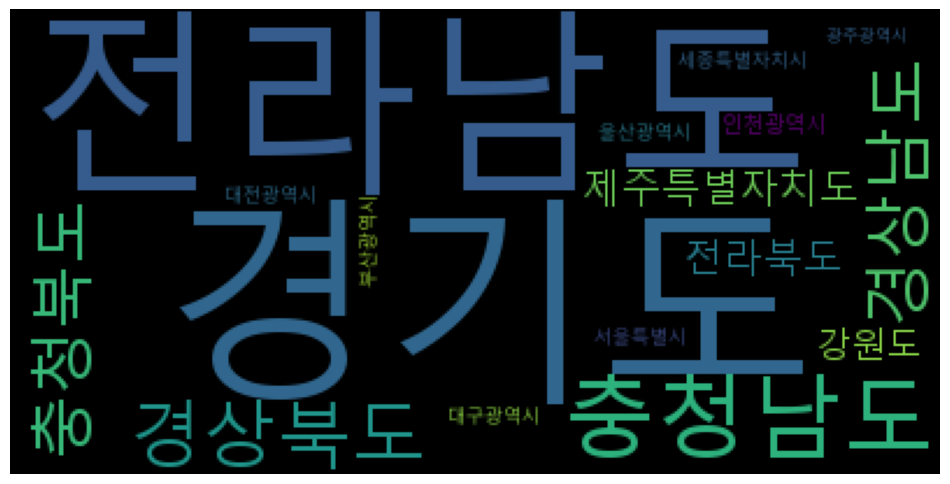

In [47]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2. Folium으로 서울시 내 구별 지하수 사용량 시각화하기

In [38]:
df.head()

,yy,administ_zone_sido_nm,administ_zone_signgu_nm,se,place_co,use_qy
0,2018,서울특별시,전체,총계,7742,20005914
1,2018,부산광역시,전체,총계,6972,28558796
2,2018,대구광역시,전체,총계,5484,22144645
3,2018,인천광역시,전체,총계,13892,40607641
4,2018,광주광역시,전체,총계,11973,17360815


In [39]:
seoul_total = df[(df['administ_zone_sido_nm'] == '서울특별시') & (df['se'] == '총계')]
seoul_total = seoul_total.drop(labels=0)
seoul_total

,yy,administ_zone_sido_nm,administ_zone_signgu_nm,se,place_co,use_qy
85,2018,서울특별시,강남구,총계,1132,808620
86,2018,서울특별시,강동구,총계,534,924710
87,2018,서울특별시,강북구,총계,376,319630
88,2018,서울특별시,강서구,총계,413,1478545
89,2018,서울특별시,관악구,총계,123,274894
90,2018,서울특별시,광진구,총계,103,3471066
91,2018,서울특별시,구로구,총계,230,427917
92,2018,서울특별시,금천구,총계,122,403518
93,2018,서울특별시,노원구,총계,274,1015615
94,2018,서울특별시,도봉구,총계,367,449210


In [40]:
seoul_total = seoul_total[['administ_zone_signgu_nm', 'use_qy']]
seoul_total = seoul_total.rename(columns={'administ_zone_signgu_nm': 'name', 'use_qy': 'value'})
seoul_total

,name,value
85,강남구,808620
86,강동구,924710
87,강북구,319630
88,강서구,1478545
89,관악구,274894
90,광진구,3471066
91,구로구,427917
92,금천구,403518
93,노원구,1015615
94,도봉구,449210


In [41]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles='Seoul')
seoul_map

In [42]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

folium.Choropleth(
    geo_data=geo_json, #지역별데이터
    data=seoul_total, #출력데이터
    columns=['name', 'value'], #컬럼 명시
    key_on='feature.properties.name', #입력했던 데이터 안에서 지역이 어디에 저장되어 있는가? feature안에 properties안에 name을 사용)
    fill_opacity=0.8, #색칠옵션(투명도)
    line_opacity=1.0, #구분선 옵션(투명도)
).add_to(seoul_map)

seoul_map

In [43]:
seoul_map.save('seoul_use_qy.html')